# **2022 Spring AI501 Homework assignment 3**
Read the following problem sheet and submit your completed $\texttt{ipynb}$ file.

In [ ]:
import numpy as np
import numpy.random as npr
from matplotlib import pyplot as plt

## Problem 1
In this problem, we empirically check the bias-variance tradeoff using a simple linear regression model. Let $p_\text{data}(x, y)$ be a true data distribution defined as
$$
x \sim \mathrm{Unif}(0, 1), \quad y | x \sim \mathcal{N}(\sin(2\pi x), \sigma_y^2),
$$
where $\sigma_y = 0.3$. During training, we don't have an access to this distribution but we are given a finite number of i.i.d. samples from it.
$$
\mathcal{D}_\text{tr} = (x_i, y_i)_{i=1}^n \overset{\mathrm{i.i.d.}}{\sim} p_\text{data}(x, y).
$$
The following codes implement the data generating process and show an example of training data generated from them.

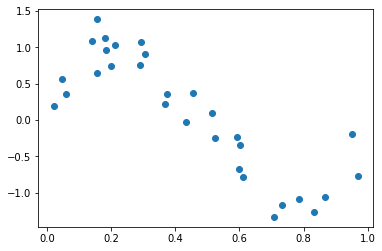

In [ ]:
def f_true(x):
    return np.sin(2*np.pi*x)

def gen_data(n, sigma_y=0.3):
    x = npr.rand(n)
    y = f_true(x) + sigma_y*npr.randn(*x.shape)
    return x, y

npr.seed(42)
x_tr, y_tr = gen_data(30)
plt.plot(x_tr, y_tr, 'o')

Given $\mathcal{D}_\text{tr}$, we setup a simple linear regression model with polynomial basis function of order $m$.
$$
f_\theta(x) = \theta^\top \phi(x), \quad \phi(x) = [1, x, \dots, x^m]^\top \in \mathbb{R}^{m+1}, \quad \theta \in \mathbb{R}^{m+1}.
$$

(a) Given the feature map $\phi(x)$, we first compute the design matrix,
$$
\Phi = \begin{bmatrix} \phi(x_1) & \dots & \phi(x_n)\end{bmatrix}^\top \in \mathbb{R}^{n \times (m+1)}.
$$
Given $\Phi$, we can compute the least square estimate of $\theta$,
$$
\mathcal{L}_\text{LS}(\mathcal{D}, \theta) = \frac{1}{2}\sum_{(x,y)\in \mathcal{D}} \Vert y - f_\theta(x)\Vert^2, \quad 
\hat\theta = \underset{\theta}{\mathrm{argmin}}\,\mathcal{L}_\text{LS}(\mathcal{D}_\text{tr}, \theta).
$$
Compute the following codes computing the design matrix and $\hat\theta$. You may use functions in $\texttt{np.linalg}$ if needed.

In [ ]:
# construct design matrix
def get_Phi(x, m):    
    # fill this part
    ######################################################################

    ######################################################################

# find least square solution
def compute_theta_LS(x, y, m):    
    # fill this part
    ######################################################################
   
    ######################################################################

(b) We will compute the bias and variance of the estimators. As we learned from the class, the expected error of a generic estimator $f(\cdot;\mathcal{D})$ computed from an arbitrary dataset $\mathcal{D}$ decomposes as

$$
\mathcal{L}(\mathcal{D}) = \underbrace{\mathbb{E}_x[(\mathbb{E}_{\mathcal{D}}[f(x;\mathcal{D})] - \mathbb{E}_y[y|x])^2]}_{(\text{bias})^2} + \underbrace{\mathbb{E}_x[\mathbb{E}_{\mathcal{D}}[(f(x;\mathcal{D}) - \mathbb{E}_{\mathcal{D}}[f(x;\mathcal{D})])^2]]}_{\text{variance}} + \sigma_y^2.
$$

We are trying to estimate $(\text{bias})^2$ and $\text{variance}$ with finite number of samples, that is, $\mathcal{D}_1, \mathcal{D}_2, \dots, \mathcal{D}_N \overset{\mathrm{i.i.d.}}{\sim} p_\text{data}$ with each $\mathcal{D}_j$ contains $n$ data points. Assuming that we are given the values $\{f(x_i;\mathcal{D}_j)\}_{i=1}^n$ for $j=1,\dots, N$, complete the following code computing the empirical estimates of the $(\text{bias})^2$ and $\text{variance}$.

In [ ]:
# x: x values used to approximate the outer expectation E_x (test x)
# fDs: matrix of size N * n, where N is the number of datasets and n is the number of data points per dataset.
# The jth row of fDs is constructed from the jth dataset Dj. It contains the values of f(x;D_j) evaluated at x.

def compute_bias2(x, fDs):
    # fill this part
    ######################################################################    

    ######################################################################

def compute_variance(x, fDs):
    # fill this part
    ######################################################################

    ######################################################################

(c) Now let's compare the polynomial regression models with different orders. We will compare the models with various $m$ values using $N=300$ datasets by computing $(\text{bias})^2$ and $\text{variance}$. Fill in the blanks of the following codes.

In [ ]:
# generating datasets
npr.seed(24)
n = 25
N = 300
Ds = [gen_data(n) for _ in range(N)]
n_test = 200
x_test = np.sort(npr.rand(n_test))

# Assess the least square estimate with the order m.
# Returns the bias^2 and variance.
def assess_LS_estimator(m, ax=None):
    # fill this part
    ######################################################################
    fDs = ...
    ######################################################################

    bias2 = compute_bias2(x_test, fDs)
    variance = compute_variance(x_test, fDs)    

    if ax is not None:
        # plotting    
        ax.set_title(fr'$m={m}$', fontsize=16)
        for (x, y), fD in zip(Ds, fDs):
            ax.plot(x, y, 'bo', alpha=0.1)
            ax.plot(x_test, fD, 'r-', linewidth=0.7)    
        ax.plot(x_test, fDs.mean(0), 'r-')
        ax.set_ylim([-1.5, 1.5])

    return bias2, variance

# compare the models with m = 2, 3, ... 6.
ms = np.arange(2, 7)
fig, axes = plt.subplots(1, len(ms), figsize=(4*len(ms), 3))
bias2s, variances = np.zeros(len(ms)), np.zeros(len(ms))
for i, (m, ax) in enumerate(zip(ms, axes)):
    bias2s[i], variances[i] = assess_LS_estimator(m, ax=ax)    
plt.tight_layout()  

plt.figure()
plt.plot(ms, bias2s, 'ro-', label='(bias)^2')
plt.plot(ms, variances, 'bx-', label='variance')
plt.plot(ms, bias2s+variances, 'kd-', label='(bias)^2+variance')
plt.xlabel(r'$m$', fontsize=16)
plt.legend(fontsize=16)  

(c) Fix $m=9$. Consider a regularized least square estimator with loss function
$$
\mathcal{L}_\text{RLS}(\mathcal{D},\theta, \lambda) = \mathcal{L}_\text{LS}(\mathcal{D}, \theta) + \frac{\lambda}{2}\Vert\theta\Vert^2.
$$
Complete the following codes inspecting the bias-variance tradeoff of the regularized least square estimator with varying $\lambda$ values.

In [ ]:
# find regularized least square solution
def compute_theta_RLS(x, y, m, lamb):    
    # fill this part
    ######################################################################
    
    ######################################################################

# Assess the regularized least square estimate with the order m and tradeoff parameter lamb.
# Returns the bias^2 and variance
def assess_RLS_estimator(m, log_lamb, ax=None):
    # fill this part
    ######################################################################
    fDs = ...
    ######################################################################

    bias2 = compute_bias2(x_test, fDs)
    variance = compute_variance(x_test, fDs)    

    if ax is not None:
        # plotting    
        ax.set_title(fr'$\log\,\,\lambda$={log_lamb:.3f}', fontsize=16)
        for (x, y), fD in zip(Ds, fDs):
            ax.plot(x, y, 'bo', alpha=0.1)
            ax.plot(x_test, fD, 'r-', linewidth=0.7)    
        ax.plot(x_test, fDs.mean(0), 'r-')
        ax.set_ylim([-1.5, 1.5])

    return bias2, variance

# lambdas to compare
log_lambs = np.linspace(-9.0, 0.0, 20)
fig, axes = plt.subplots(1, 5, figsize=(4*5, 3))
bias2s, variances = np.zeros(20), np.zeros(20)
m = 9
for i, log_lamb in enumerate(log_lambs):
    ax = axes[i//4] if i%4 == 0 else None
    bias2s[i], variances[i] = assess_RLS_estimator(m, log_lamb, ax=ax)        
plt.tight_layout()  

plt.figure()
plt.plot(log_lambs, bias2s, 'ro-', label='(bias)^2')
plt.plot(log_lambs, variances, 'bx-', label='variance')
plt.plot(log_lambs, bias2s+variances, 'kd-', label='(bias)^2+variance')
plt.xlabel(r'$\log\,\,\lambda$', fontsize=16)
plt.legend(fontsize=16)  

## Problem 2
In this problem, we will implement Principal component analysis (PCA) for image data. The following codes load, proproces, and visualize the MNIST handwritten digits dataset.


In [ ]:
import tensorflow.keras as keras
(x_train, y_train), _ = keras.datasets.mnist.load_data()
# preprocess data
x = x_train.reshape((-1, 784)) / 255.0 
# center data to have zero mean
mean = x.mean(0)
x = x - mean
def plot_tiled_images(x, title=None):
    fig, axes = plt.subplots(5, 5, figsize=(4, 4))        
    for i in range(5):
        for j in range(5):
            img = (x[5*i+j] + mean).reshape((28, 28))
            axes[i,j].imshow(img, cmap='gray')
            axes[i,j].axis('off')    
    plt.subplots_adjust(wspace=0, hspace=0)
    if title is not None:
        plt.suptitle(title, fontsize=15)   
plot_tiled_images(x, title='Original data')

(a) Fill in the blanks of the following codes. The first function takes data $X \in \mathbb{R}^{n\times d}$ and returns a projection matrix $W \in \mathbb{R}^{d\times k}$ projecting $X$ onto $\mathbb{R}^{k}$. The second function takes data $X$ and projection matrix $W$ to project and reconstruct the data $X' \in \mathbb{R}^{n\times d}$. If PCA was done right, the reconstruction error between $X$ and $X'$ should be minimized.

In [ ]:
# computes a projection matrix to k dimensional subspace using PCA
def PCA(x, k):
    # fill this part
    ######################################################################
   
    ######################################################################

def project_and_reconstruct(x, w):
     # fill this part
    ######################################################################
   
    ######################################################################

ks = np.arange(10, 100, 20)
w = PCA(x, ks[-1])
for k in ks:    
    plot_tiled_images(project_and_reconstruct(x, w[:,:k]), title=rf'Reconstruction with $k={k}$')   


(b) Rather than choosing $k$ manually, we can choose $k$ in terms of the explained variance. Recall that the variance on the $j$th projected axis is given as $w_j^\top S w_j$ where $w_j$ is the $j$th column of the projection matrix $W$ and $S$ is the empirical covariance of $X$. The explained variance of the projection matrix $W$ with $k$ columns is then defined as
$$
\mathrm{EV}(k) = \frac{\sum_{j=1}^k w_j^\top S w_j}{\sum_{j=1}^d w_j^\top S w_j}.
$$
Based on $\mathrm{EV}(k)$, we can choose $k$ based on how much of the variance we would like to maintain in the projected space. For instance, if we want to project data so that 90% of the variance is explained, we can choose the smallest $k$ such that $\mathrm{EV}(k) > 0.9$.
 
Complete the following code implementing this scheme.

In [ ]:
# PCA with k chosen to explain over thres portion of the variance
def PCA_explained_variance(x, thres):
    # fill this part
    ######################################################################
          
    ######################################################################

thress = [0.8, 0.9, 0.95]
for thres in thress:
    w = PCA_explained_variance(x, thres)
    plot_tiled_images(project_and_reconstruct(x, w),
                      title=rf'{thres} of variance explained, $k={w.shape[1]}$') 

## Problem 3
In this problem, we will implement $k$-means clustering and apply it to a 2D clustering problem. 
The following code generates and plots the data to be used.

In [ ]:
from sklearn.datasets._samples_generator import make_blobs
from matplotlib import cm
x, y_true = make_blobs(n_samples=2000, centers=4, cluster_std=0.50, random_state=0)
def plot_clustering(x, y):
    uy = np.unique(y)    
    colors = cm.rainbow(np.linspace(0, 1, len(uy)))
    for l, c in zip(uy, colors):
        plt.scatter(x[y==l, 0], x[y==l,1], color=c, edgecolor=0.6*c)
plot_clustering(x, y_true)


(a) Complete the following code implementing $k$-means clustering algorithm. Try to minimize the use of $\texttt{for}$ loop in the blank. Actually, you can complete it without any $\texttt{for}$ loop if you use matrix and vector multiplications properly.

In [ ]:
# Takes data x of shape (num_data, dimension), number of clusters k, and maximum number of iterations.
# Returns the cluster labels z of shape (num_data,), the mean matrix of shape (k, dimension), 
# and the number of iterations run until the convergence.
def kmeans(x, k, max_num_iter, init_means=None):
    n = len(x)
    z = np.zeros(n, dtype=int)

    # randomly initialize centers
    means = x[npr.permutation(n)[:k]].copy() if init_means is None else init_means

    # loss for checking convergence
    loss_prev = np.inf

    for i in range(max_num_iter):
        # fill this part
        ######################################################################
     
        ######################################################################

        loss = np.sum((x - means[z])**2)
        if not np.isinf(loss_prev) and abs((loss_prev-loss)/loss_prev) < 1e-7:                    
            break
        else:
            loss_prev = loss    

    return z, means, i

As we have learned from the class, $k$-means clustering is quite sensitive to initialization. Run the following code block several times, and you will find that the algorithm occasionally fails and produces weird clustering results. Using the true label $\texttt{y_true}$, we can check whether the results given by $k$-means are good or not. We will treat a clustering result $\texttt{z}$ as a success if the adjusted Rand index (the score measuring similarity between two clustering labels) between $\texttt{y_true}$ and $\texttt{z}$ is larger than 0.95.

In [ ]:
from sklearn.metrics import adjusted_rand_score
def check_success(z):
    return adjusted_rand_score(z, y_true) > 0.95

z, means, iter = kmeans(x, 4, 200)
print(f'Converged at iter {iter}')
if check_success(z):
    print('Success')
else:
    print('Fail')
plot_clustering(x, z)

The following code verifies the sensitivity of $k$-means to initializations by running it multiple times and counting the average success rate.

In [ ]:
avg_sucess = 0
avg_iter = 0
num_trials = 500
for _ in range(num_trials):
    z, means, iter = kmeans(x, 4, 200)
    avg_sucess += check_success(z)
    avg_iter += iter
print(f'success rate {avg_sucess/num_trials:.4f}, average iteration to converge {avg_iter/num_trials:.4f}')

(b) Implement the $k$-means++ algorithm for initialization, and check if it improves the robustness of the algorithm. The pseudo-code of $k$-means++ can be found in the lecture note.

In [ ]:
def kmeanspp(x, k):
    # fill this part
    ######################################################################

    ######################################################################

avg_sucess = 0
avg_iter = 0
num_trials = 500
for _ in range(num_trials):
    z, means, iter = kmeans(x, 4, 200, init_means=kmeanspp(x, 4))
    avg_sucess += check_success(z)
    avg_iter += iter
print(f'success rate {avg_sucess/num_trials:.4f}, average iteration to converge {avg_iter/num_trials:.4f}')